<a href="https://colab.research.google.com/github/davidcenna/Finance-and-Stock-Market-Analysis-using-Python/blob/main/GWP_submission_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WQU Group Submission 2



[*********************100%***********************]  11 of 11 completed


,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
1998-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-12-23,0.010503,NaN,0.020819,0.014745,0.017450,0.023891,0.024175,NaN,-0.004191,0.022471,0.004295
1998-12-24,0.023014,NaN,-0.005263,0.006605,0.013192,-0.003810,-0.001728,NaN,0.018411,0.006105,0.018326
1998-12-28,-0.008708,NaN,-0.005290,-0.013123,0.005208,0.002868,-0.005766,NaN,-0.005166,-0.014563,-0.008999
1998-12-29,0.018302,NaN,0.009973,0.010638,0.014248,0.002860,0.022042,NaN,0.016615,0.022168,0.021792
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-30,-0.001047,0.006846,-0.011762,-0.014103,-0.001144,0.010759,0.004458,0.012172,0.001460,0.005645,0.007534
2021-08-31,-0.002912,0.003751,-0.006772,-0.001300,-0.002767,-0.005260,0.002219,0.005907,-0.001166,-0.001329,0.002402
2021-09-01,-0.002570,0.005022,-0.014669,-0.005729,-0.003827,0.000252,0.005259,0.017198,0.013131,0.000296,-0.000054


## 5	Category 3 Portfolios:  All Combinations
### 5.1	Use 2019 daily return data.  Apply a robust method of calculating the efficient frontier for all 165 (11 choose 3) combinations of 3 Select SPDR portfolios.  DO NOT GRAPH THESE!  You are allowed to be short securities.  Call these the trained portfolios.
### 5.2	Assume a fixed amount of risk.  Use each portfolio's EF to determine the weights of each of the 3 securities.

In [3]:
!pip install yfinance
!pip install pyportfolioopt
import pandas as pd
import numpy as np
import yfinance as yf
spdrs_list= "XLP XLE XLF XLV XLI XLC XLY XLB XLK XLU XLRE"
spdrs_price= yf.download(spdrs_list)['Adj Close']
spdrs_price_data=spdrs_price.pct_change()
import itertools as it

from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import sample_cov, CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
import pypfopt as pf
from pypfopt import plotting

etf_combinations=[comb for comb in it.combinations(spdrs_price_data.columns,3)] #all combinations 3 of 11


portfolio_weights_target = pd.DataFrame(index = etf_combinations)
prices19 = spdrs_price['2019'] 
target_vol = 0.16 # fixed amount of risk - target volatlity

for comb in etf_combinations:
    p3=prices19[list(comb)].dropna() #prices of 3 ETFs
    risk=CovarianceShrinkage(p3).ledoit_wolf()
    ef=EfficientFrontier(mean_historical_return(p3,compounding=False), risk,weight_bounds=(-1,1))
    
    weights = ef.efficient_risk(target_vol)
    for key in weights:
        portfolio_weights_target.loc[[comb],key] = weights[key]

portfolio_weights_target = portfolio_weights_target.fillna(0)
portfolio_weights_target.head(10)

[*********************100%***********************]  11 of 11 completed


,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
"(XLB, XLC, XLE)",0.600171,0.781237,-0.381408,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
"(XLB, XLC, XLF)",-0.372292,0.441681,0.000000,0.930611,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
"(XLB, XLC, XLI)",-0.426526,0.577203,0.000000,0.000000,0.849323,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
"(XLB, XLC, XLK)",0.171016,0.162793,0.000000,0.000000,0.000000,0.666191,0.000000,0.0,0.000000,0.000000,0.000000
"(XLB, XLC, XLP)",-0.747558,0.763582,0.000000,0.000000,0.000000,0.000000,0.983976,0.0,0.000000,0.000000,0.000000
"(XLB, XLC, XLRE)",-0.540003,0.540003,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
"(XLB, XLC, XLU)",-0.613784,0.902376,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.711407,0.000000,0.000000
"(XLB, XLC, XLV)",0.162686,0.944816,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.107501,0.000000
"(XLB, XLC, XLY)",-0.293999,0.681111,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.612888
"(XLB, XLE, XLF)",0.339499,0.000000,-0.315515,0.976016,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


### 5.3	Rank the 2019 portfolio returns.

In [5]:
portfolio_returns_2019 = portfolio_weights_target.dot(spdrs_price_data['2019'].mean()*252) #annualized returns for 2019
display(pd.DataFrame(portfolio_returns_2019.sort_values(ascending=False), columns = ['portfolio_returns_2019']))


,portfolio_returns_2019
"(XLE, XLK, XLU)",0.455575
"(XLK, XLU, XLV)",0.454603
"(XLE, XLK, XLRE)",0.447021
"(XLK, XLRE, XLV)",0.441472
"(XLE, XLK, XLP)",0.440273
...,...
"(XLP, XLRE, XLY)",0.251232
"(XLP, XLRE, XLU)",0.250751
"(XLRE, XLU, XLY)",0.248133
"(XLI, XLU, XLY)",0.244792


### 5.4	Test each of the 165 portfolios using 2020 daily return data.  

In [8]:
test_portfolio = portfolio_weights_target.dot(spdrs_price_data['2020'].mean()*252).to_frame('Ret2020')

#Daily return variances
test_portfolio['DailyVar2020'] = portfolio_weights_target.apply(lambda weights: weights.dot(spdrs_price_data['2020'].cov()).dot(weights.T), axis=1)
test_portfolio['Vol2020'] = np.sqrt(test_portfolio.DailyVar2020*252) #annualized st.dev (volatility)
test_portfolio['Sharpe2020'] = (test_portfolio.Ret2020-0.01)/test_portfolio.Vol2020 # Sharpe ratio with risk-free rate = 1%

test_portfolio['Ret2019'] = portfolio_returns_2019
test_portfolio['Difference']=test_portfolio.Ret2020-test_portfolio.Ret2019
test_portfolio['SquaredDiff'] = test_portfolio.Difference**2
display(test_portfolio)
print('Mean Squared Difference:', test_portfolio.SquaredDiff.mean())

,Ret2020,DailyVar2020,Vol2020,Sharpe2020,Ret2019,Difference,SquaredDiff
"(XLB, XLC, XLE)",0.464184,0.000417,0.323983,1.401878,0.309774,0.154410,0.023843
"(XLB, XLC, XLF)",0.112235,0.000683,0.414972,0.246365,0.309131,-0.196896,0.038768
"(XLB, XLC, XLI)",0.212665,0.000492,0.352013,0.575732,0.293667,-0.081002,0.006561
"(XLB, XLC, XLK)",0.386266,0.000554,0.373785,1.006638,0.365834,0.020431,0.000417
"(XLB, XLC, XLP)",0.162231,0.000360,0.301169,0.505468,0.290332,-0.128101,0.016410
...,...,...,...,...,...,...,...
"(XLP, XLV, XLY)",0.269581,0.000433,0.330240,0.786038,0.308470,-0.038889,0.001512
"(XLRE, XLU, XLV)",0.000628,0.000882,0.471447,-0.019878,0.286923,-0.286295,0.081965
"(XLRE, XLU, XLY)",-0.067605,0.000797,0.448093,-0.173190,0.248133,-0.315738,0.099691
"(XLRE, XLV, XLY)",0.187024,0.000832,0.457878,0.386617,0.317405,-0.130381,0.016999


Mean Squared Difference: 0.029733889752703982


### 5.5	Rank the 2020 portfolio returns.

In [9]:
#first, rank by 2020 return
test_portfolio.Ret2020.sort_values(ascending=False)

(XLE, XLK, XLU)     0.545141
(XLE, XLV, XLY)     0.535192
(XLB, XLE, XLY)     0.534314
(XLE, XLK, XLP)     0.533913
(XLE, XLU, XLY)     0.513726
                      ...   
(XLF, XLP, XLY)    -0.096189
(XLB, XLF, XLRE)   -0.108720
(XLC, XLF, XLRE)   -0.124761
(XLF, XLU, XLY)    -0.151931
(XLF, XLRE, XLY)   -0.171943
Name: Ret2020, Length: 165, dtype: float64

In [10]:
#second, rank by 2020 Sharpe ratio
test_portfolio.Sharpe2020.sort_values(ascending=False)

(XLB, XLE, XLY)     1.578768
(XLE, XLV, XLY)     1.564736
(XLC, XLE, XLY)     1.479173
(XLE, XLP, XLY)     1.424138
(XLE, XLK, XLP)     1.417869
                      ...   
(XLC, XLF, XLRE)   -0.237775
(XLB, XLF, XLRE)   -0.241471
(XLF, XLP, XLY)    -0.249477
(XLF, XLU, XLY)    -0.307125
(XLF, XLRE, XLY)   -0.332281
Name: Sharpe2020, Length: 165, dtype: float64

In [11]:
#finally, rank by the least squared difference 2020-2019 (out-of-sample consistence)
test_portfolio.SquaredDiff.rank().sort_values()

(XLB, XLI, XLK)       1.0
(XLC, XLI, XLP)       2.0
(XLC, XLE, XLRE)      3.0
(XLI, XLK, XLU)       4.0
(XLE, XLU, XLV)       5.0
                    ...  
(XLC, XLF, XLRE)    161.0
(XLB, XLF, XLU)     162.0
(XLF, XLU, XLY)     163.0
(XLB, XLF, XLRE)    164.0
(XLF, XLRE, XLY)    165.0
Name: SquaredDiff, Length: 165, dtype: float64

## 6	Analyzing 3-Security Portfolio
	Recall from the previous assignment, you assigned each ETF to 1 of 3 groups: Leading, Coincidental, or Lagging Economic Indicators.  
### 6.1	Relabel the ETF with a + sign if the weight >0, or a - sign if the weight <0.  Then add the assigned Economic Indicator.
	For example, if a portfolio were long XLRE, and XLRE was a LEI, then XLRE -> +LEI.  
	For example, if a portfolio were short XLF, and XLF was a LAG, then XLF -> -LAG.  
	Do this for each security in each portfolio.


In [12]:
# Import GWP1 metrics
lei = pd.read_csv('lei.csv',index_col=0)
lei

,RSquared,MSE,AIC
ETFS,,,
XLB,0.262826,0.003827,-244.270779
XLC,0.297244,0.001197,-340.281439
XLE,0.203488,0.004708,-205.361578
XLF,0.489401,0.007102,-270.968658
XLI,0.419054,0.005357,-270.798157
XLK,0.503811,0.007009,-276.066824
XLP,0.254986,0.001930,-290.617246
XLRE,0.175131,0.001227,-288.858964
XLU,0.153733,0.001462,-265.034657


In [13]:
# Import GWP1 metrics
lag = pd.read_csv('lag.csv',index_col=0)
lag

,RSquared,MSE,AIC
ETFS,,,
XLB,0.058405,0.001215,-232.648697
XLC,0.053409,0.000307,-324.835721
XLE,0.043053,0.001423,-198.149153
XLF,0.146384,0.003035,-239.968051
XLI,0.078100,0.001426,-243.550082
XLK,0.177864,0.003535,-245.710448
XLP,0.080660,0.000872,-281.479019
XLRE,0.109224,0.001093,-289.324438
XLU,0.152627,0.002073,-270.940573


In [14]:
# Import GWP1 metrics
cei = pd.read_csv('cei.csv',index_col=0)
cei

,RSquared,MSE,AIC
ETFS,,,
XLB,0.034218,0.001661,-238.822545
XLC,0.038250,0.000513,-331.691833
XLE,0.017972,0.001386,-204.286354
XLF,0.066126,0.003198,-241.498134
XLI,0.058395,0.002488,-250.027345
XLK,0.142021,0.006586,-250.638006
XLP,0.081977,0.002069,-289.582249
XLRE,0.063903,0.001492,-293.751390
XLU,0.089929,0.002850,-273.801087


In [15]:
#combine MSE for all 3 indicators
mse_all = lei.MSE.to_frame('LEI_mse')
mse_all['CEI_mse'] = cei.MSE
mse_all['LAG_mse'] = lag.MSE
mse_all

,LEI_mse,CEI_mse,LAG_mse
ETFS,,,
XLB,0.003827,0.001661,0.001215
XLC,0.001197,0.000513,0.000307
XLE,0.004708,0.001386,0.001423
XLF,0.007102,0.003198,0.003035
XLI,0.005357,0.002488,0.001426
XLK,0.007009,0.006586,0.003535
XLP,0.001930,0.002069,0.000872
XLRE,0.001227,0.001492,0.001093
XLU,0.001462,0.002850,0.002073


In [16]:
#find best fit for each ETF
mse_all['best_fit']=mse_all.apply(lambda x: x.idxmax(), axis=1)
mse_all

,LEI_mse,CEI_mse,LAG_mse,best_fit
ETFS,,,,
XLB,0.003827,0.001661,0.001215,LEI_mse
XLC,0.001197,0.000513,0.000307,LEI_mse
XLE,0.004708,0.001386,0.001423,LEI_mse
XLF,0.007102,0.003198,0.003035,LEI_mse
XLI,0.005357,0.002488,0.001426,LEI_mse
XLK,0.007009,0.006586,0.003535,LEI_mse
XLP,0.001930,0.002069,0.000872,CEI_mse
XLRE,0.001227,0.001492,0.001093,CEI_mse
XLU,0.001462,0.002850,0.002073,CEI_mse


In [19]:
def NewLabel(etf, weight):
    if weight >0:
        return '+'+mse_all.best_fit[etf]
    elif weight <0:
        return '-'+mse_all.best_fit[etf]
    else:
        return ''

target_relabeled= pd.DataFrame(index=etf_combinations, columns=portfolio_weights_target.columns)

tw= portfolio_weights_target.apply(lambda etfs: [NewLabel(etf, weight) for etf, weight in dict(etfs).items()], axis=1)

for comb in etf_combinations:
    target_relabeled.loc[[comb],:] = tw[comb]

target_relabeled.head(20)

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
"(XLB, XLC, XLE)",+LEI_mse,+LEI_mse,-LEI_mse,,,,,,,,
"(XLB, XLC, XLF)",-LEI_mse,+LEI_mse,,+LEI_mse,,,,,,,
"(XLB, XLC, XLI)",-LEI_mse,+LEI_mse,,,+LEI_mse,,,,,,
"(XLB, XLC, XLK)",+LEI_mse,+LEI_mse,,,,+LEI_mse,,,,,
"(XLB, XLC, XLP)",-LEI_mse,+LEI_mse,,,,,+CEI_mse,,,,
"(XLB, XLC, XLRE)",-LEI_mse,+LEI_mse,,,,,,+CEI_mse,,,
"(XLB, XLC, XLU)",-LEI_mse,+LEI_mse,,,,,,,+CEI_mse,,
"(XLB, XLC, XLV)",+LEI_mse,+LEI_mse,,,,,,,,-LEI_mse,
"(XLB, XLC, XLY)",-LEI_mse,+LEI_mse,,,,,,,,,+LEI_mse
"(XLB, XLE, XLF)",+LEI_mse,,-LEI_mse,+LEI_mse,,,,,,,


In [20]:
#selecting the best 20 combinations according to the best Sharpe ratio in 2020 
best20 = test_portfolio.Sharpe2020.sort_values(ascending=False).head(20)
best20

(XLB, XLE, XLY)     1.578768
(XLE, XLV, XLY)     1.564736
(XLC, XLE, XLY)     1.479173
(XLE, XLP, XLY)     1.424138
(XLE, XLK, XLP)     1.417869
(XLB, XLC, XLE)     1.401878
(XLE, XLI, XLY)     1.365336
(XLB, XLE, XLV)     1.325532
(XLE, XLK, XLU)     1.287795
(XLE, XLU, XLY)     1.280124
(XLC, XLE, XLV)     1.275033
(XLB, XLE, XLP)     1.248132
(XLC, XLE, XLP)     1.231897
(XLE, XLK, XLY)     1.223954
(XLE, XLK, XLV)     1.219006
(XLC, XLE, XLI)     1.197637
(XLE, XLI, XLP)     1.188486
(XLE, XLK, XLRE)    1.176752
(XLF, XLK, XLP)     1.171973
(XLE, XLI, XLV)     1.164627
Name: Sharpe2020, dtype: float64

In [21]:

#Relabelled data for the best 20 combinations
target_relabeled.loc[best20.index]

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
"(XLB, XLE, XLY)",+LEI_mse,,-LEI_mse,,,,,,,,+LEI_mse
"(XLE, XLV, XLY)",,,-LEI_mse,,,,,,,+LEI_mse,+LEI_mse
"(XLC, XLE, XLY)",,+LEI_mse,-LEI_mse,,,,,,,,+LEI_mse
"(XLE, XLP, XLY)",,,-LEI_mse,,,,+CEI_mse,,,,+LEI_mse
"(XLE, XLK, XLP)",,,-LEI_mse,,,+LEI_mse,+CEI_mse,,,,
"(XLB, XLC, XLE)",+LEI_mse,+LEI_mse,-LEI_mse,,,,,,,,
"(XLE, XLI, XLY)",,,-LEI_mse,,+LEI_mse,,,,,,+LEI_mse
"(XLB, XLE, XLV)",+LEI_mse,,-LEI_mse,,,,,,,+LEI_mse,
"(XLE, XLK, XLU)",,,-LEI_mse,,,+LEI_mse,,,+CEI_mse,,
"(XLE, XLU, XLY)",,,-LEI_mse,,,,,,+CEI_mse,,+LEI_mse


## 7	Category 4 Portfolios: Using Principal Components
7.1	Compute the PCA from the correlation matrix of the 11 ETFs.

In [22]:
rets2019=spdrs_price_data['2019']
#eigen-decompose correlation matirix
eig_val, eig_vec = np.linalg.eig(rets2019.corr()) 
# index of sorted eigenvalues
sort_idx = np.argsort(eig_val)[::-1] 
#first 3 components
n_comp = eig_vec[sort_idx[:3]] 
#projected returns on 3 components
rets2019_proj = rets2019.dot(n_comp.T) 
rets2019_proj

,0,1,2
Date,,,
2019-01-02,-0.001200,0.023182,-0.009516
2019-01-03,0.010266,-0.028718,-0.007865
2019-01-04,-0.011952,0.035831,0.011048
2019-01-07,0.004168,0.014649,0.005283
2019-01-08,-0.000155,0.002833,0.013080
...,...,...,...
2019-12-24,0.002356,-0.001409,0.000424
2019-12-26,0.006234,0.000830,0.004108
2019-12-27,-0.000274,-0.005994,0.002854


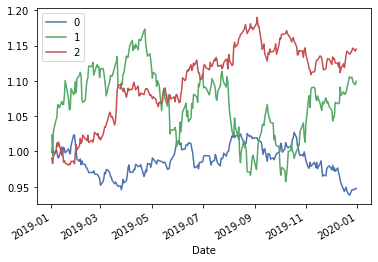

In [23]:
#cummulative return for 3 components
(1+rets2019_proj).cumprod().plot()

### 7.2	Using 2019 data, compute the EF for the first 3 principal components portfolio.

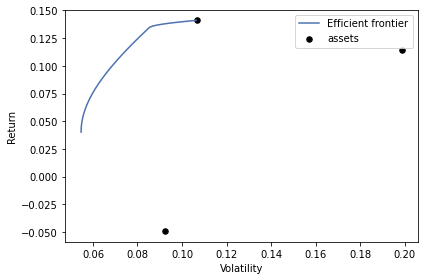

In [24]:
ef_pca = EfficientFrontier(rets2019_proj.mean()*252,sample_cov(rets2019_proj,returns_data=True))
plotting.plot_efficient_frontier(ef_pca)

### 7.3	How does the PCA portfolio return compare to the 2019  3-security portfolio returns?

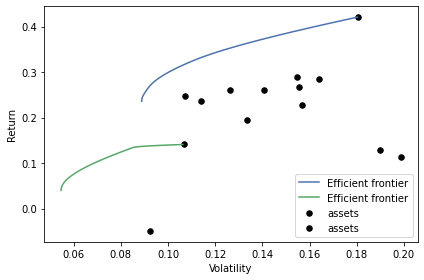

In [25]:
EF_2019 = EfficientFrontier(spdrs_price_data['2019'].mean()*252,sample_cov(spdrs_price_data['2019'],returns_data=True))

plotting.plot_efficient_frontier(EF_2019, show_assets=True)
plotting.plot_efficient_frontier(ef_pca, show_assets=True)

We see from the above plot that the path of 2019 portfolio EF return is higher that of the PCA portfolio EF return but at the risk of higher volatility in comparison to that of the PCA. They both support in favor of a Portfolio asset to have the highest weight. The two EFs shows two different risk evaluation for different investors (low risk at a favourable low return and high risk at higher return)

### 7.4	Assuming a fixed amount of risk, and 2020 data, use the PC weights to compute the 3-PC portfolio returns.

In [26]:
target_vol=0.30
pc3_weights = ef_pca.efficient_risk(target_vol)
pc3_weights

OrderedDict([(0, 3.87681e-11), (1, 1.9759288e-09), (2, 0.9999999979853544)])

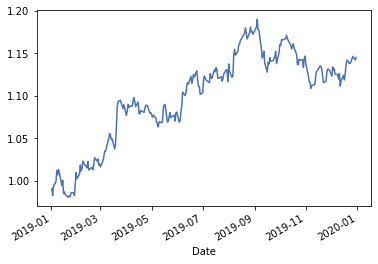

In [27]:
pc3_return = rets2019_proj.dot(np.array(list(pc3_weights.values())))
pc3_cumret = (1+pc3_return).cumprod()
pc3_cumret.plot()

### 7.5	How does the PCA portfolio return compare to the 2020  3-security portfolio returns?

In [28]:
rets2020=spdrs_price_data['2020']
EF_2020 = EfficientFrontier(rets2020.mean()*252,sample_cov(rets2020,returns_data=True))
weights_2020 = EF_2020.efficient_risk(target_vol)
weights_2020

OrderedDict([('XLB', 5.498722e-10),
             ('XLC', 0.2695963737164541),
             ('XLE', 2.56461e-11),
             ('XLF', 9.43474e-11),
             ('XLI', 2.305617e-10),
             ('XLK', 0.0091276205672947),
             ('XLP', 0.3222171335999272),
             ('XLRE', 1.27383e-10),
             ('XLU', 2.110336e-10),
             ('XLV', 3.78279e-09),
             ('XLY', 0.3990588670947416)])

In [29]:
portfolio_return2020 = rets2020.dot(np.array(list(weights_2020.values())))
port2020_cumret = (1+portfolio_return2020).cumprod()

print(f'2019 mean daily return of 3 PC (at {target_vol}):',pc3_return.mean())
print(f'2020 mean daily return of 11 ETFs portfolio  (at {target_vol}):',portfolio_return2020.mean())

2019 mean daily return of 3 PC (at 0.3): 0.0005600314299389313
2020 mean daily return of 11 ETFs portfolio  (at 0.3): 0.0010019042973410542


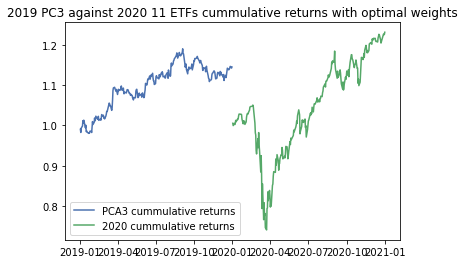

In [30]:
import matplotlib.pyplot as plt
plt.plot(pc3_cumret, label='PCA3 cummulative returns')
plt.plot(port2020_cumret, label='2020 cummulative returns')
plt.title(f'2019 PC3 against 2020 11 ETFs cummulative returns with optimal weights')
plt.legend()